## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Multivariate LR

In [2]:
df = pd.read_csv('MultipleLR.csv', header=None)
x = df.to_numpy()
y = x[:, [-1]]

x = np.block([np.ones((x.shape[0],1)), x[:,0:-1]])
print(y.shape)
print(x.shape)

(25, 1)
(25, 4)


### Main Functions 

In [3]:
def initialization(x):
    costs, thetas = [], []
    n = x.shape[1]
    theta = np.zeros((n, 1))
    return n, theta, costs, thetas
    
def h(x, theta) : 
    y_pred = x @ theta
    return y_pred

def cost(n, e):
    loss = (1/(2* n))*(e.T @ e)[0][0] #why [0][0] 
    return loss

def calc_gradient(n, x, e):
    D_theta = x.T @ e * (1/n)
    return D_theta 
    
def thetaVSloss(thetas_ls, costs):
    thetas_ls = np.squeeze(thetas_ls)
    n, m = thetas_ls.shape
    fig, a =  plt.subplots(1, m, figsize=(20, 5))
    for i, th in enumerate(thetas_ls.T):
        a[i].plot(th, costs)
        a[i].scatter(th, costs, marker='o', color='orange')
        a[i].set(xlabel=f"theta{i+1}", ylabel='cost')
    print(n, m)

# Batch GD


In [4]:
def GD(x, y, alpha, it):
    costs, thetas = [], []
    n = x.shape[1]
    theta = np.zeros((n, 1))
    for i in range (it): 
        
        #hypothisis
        y_pred = h(x, theta)
        #calc cost
        err = y_pred - y
        loss = cost(n, err)
        # return loss
        costs.append(loss)
        #calc gradient
        D_theta = calc_gradient(n, x, err)
        
        #4. get the direction and update 
        theta = theta - alpha * D_theta 

        thetas.append(theta)
         
    return thetas, costs, theta 

In [5]:
thetas, costs, theta = GD(x, y, 0.00001, 100)
r = r2_score(y, h(x, theta))
print(r)

0.9810044245465175


## Loss vs no. of iterations

Text(0.5, 1.0, 'Loss vs no. of iterations')

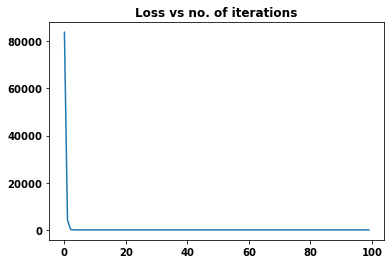

In [6]:
fig2 = plt.figure(2)
plt.plot(costs)
plt.title("Loss vs no. of iterations")

## Loss vs Thetas

100 4


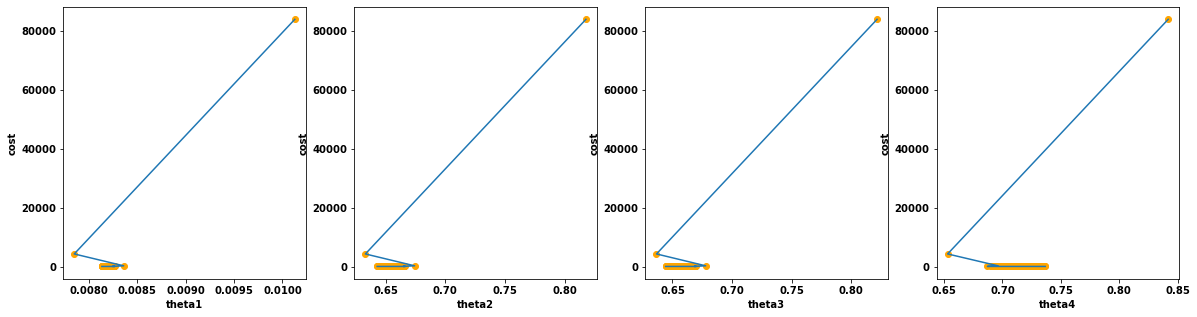

In [7]:
thetaVSloss(thetas, costs)
